# Prevalence of people with rCSI >= 19 time-series released by World Food Programme (WFP)

In this notebook, we create the time-series regarding the **Reduced Coping Strategy Index (rCSI)** indicator. In particular, these time-series will describe the % of people with rCSI >= 19.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import pandas as pd
import numpy as np
import ntpath
import glob
plt.style.use("default")

In [2]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../../packages/")
from MapPlot.MapPlot import draw_adminstratas
from TsIP.TsIP import TsIP

In [3]:
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_timeseries/"

In [4]:
# Read the data released by wfp regarding the % of people with rCSI>=19.
path = "./wfp_data/"
all_folders = glob.glob(path + "*")

dfs = []

for folder in all_folders:
    country = ntpath.basename(folder).split(".")[0]
    all_files = glob.glob(path + country + "/*.csv")
    for filename in all_files:
        df = pd.read_csv(filename)
        df["Country"] = country
        dfs.append(df)

In [5]:
# Concatenate data.
df = pd.concat(dfs, axis = 0, ignore_index = True)
# Delete duplicate rows if exist.
df = df.drop_duplicates()
df.head()

,SvyDate,Date,Dmgrph,DmgrphCode,Mean_crrnt,Pop,PopNmbr,Country
0,2019-7-15_2019-9-8,2019-09-08,BOUCLE-DU-MOUHOUN,900712,19.49950,1816310,354171,Burkina Faso
1,2019-7-15_2019-9-8,2019-09-08,CASCADES,900713,8.43056,755896,63726,Burkina Faso
2,2019-7-15_2019-9-8,2019-09-08,CENTRE,900714,7.58997,2623394,199114,Burkina Faso
3,2019-7-15_2019-9-8,2019-09-08,CENTRE-EST,900715,20.05105,2623394,526018,Burkina Faso
4,2019-7-15_2019-9-8,2019-09-08,CENTRE-NORD,900716,18.75761,1551284,290983,Burkina Faso


### Brief items description

- *SvyDate*: reference period of the data collection;
- *Date*: reference date (i.e. the end of the reference period);
- *Dmgrph*: administrative area name;
- *DmgrphCode*: a code for identyfing the adminstrata;
- *Mean_crrnt*: corresponds to the % of people with rCSI >= 19 during the corresponding SvyDate; 
- *Pop*: area population size;
- *PopNmbr*: number of people with rCSI >= 19.

N.B. For simplicity in the following we will indicate the prevalence of people with rCSI >= 19 with the 'rCSI >= 19' notation only.

In [6]:
# Check if the dataframe contains NaN values.
df.isnull().sum()

SvyDate       0
Date          0
Dmgrph        0
DmgrphCode    0
Mean_crrnt    0
Pop           0
PopNmbr       0
Country       0
dtype: int64

In [7]:
# Let's delete some items because they are not of interest in this notebook.
df.drop(["DmgrphCode", "Pop", "PopNmbr"], axis = 1, inplace = True) 

In [8]:
# Rename some columns items.
df.rename(columns = {"Date": "Datetime", "Dmgrph": "AdminStrata", "Mean_crrnt": "rCSI >= 19"}, inplace = True)

In [9]:
# Check the temporal ranges of the SvyDate column based on country creating two new columns.
df[["SvyDate1", "SvyDate2"]] = df["SvyDate"].apply(lambda x: pd.Series([pd.to_datetime(x.split("_")[0]), pd.to_datetime(x.split("_")[1])]))
# The new column 'SvyDateRange' indicates the coverage of days of the survey.
df["SvyDateRange"] = (df["SvyDate2"] - df["SvyDate1"]).dt.days + 1
df.head()

,SvyDate,Datetime,AdminStrata,rCSI >= 19,Country,SvyDate1,SvyDate2,SvyDateRange
0,2019-7-15_2019-9-8,2019-09-08,BOUCLE-DU-MOUHOUN,19.49950,Burkina Faso,2019-07-15,2019-09-08,56
1,2019-7-15_2019-9-8,2019-09-08,CASCADES,8.43056,Burkina Faso,2019-07-15,2019-09-08,56
2,2019-7-15_2019-9-8,2019-09-08,CENTRE,7.58997,Burkina Faso,2019-07-15,2019-09-08,56
3,2019-7-15_2019-9-8,2019-09-08,CENTRE-EST,20.05105,Burkina Faso,2019-07-15,2019-09-08,56
4,2019-7-15_2019-9-8,2019-09-08,CENTRE-NORD,18.75761,Burkina Faso,2019-07-15,2019-09-08,56


This information about the survey coverage will be useful when adapting the time-series of other indicators (see other notebooks) to this coverage format. The survey coverage of the rCSI >= 19 indicator is identical to the survey coverage of the FCG <= 2 indicator for all the countries.

**N.B.** Nigeria country have two different coverage values (see time-series below).

### Country item

In [10]:
print("The countries are:", ", ".join(df.Country.unique()))

The countries are: Burkina Faso, Nigeria, Syria, Yemen


### AdminStrata item

In [11]:
# The strings of the administrative regions of Burkina Faso country are uppercase, we change them to obtain lowercase with first capital letter.
def to_lower(country, admin):
    if country == "Burkina Faso":
        admin = admin.lower().title()      
    return admin
    
df["AdminStrata"] = df[["Country", "AdminStrata"]].apply(lambda x: to_lower(*x), axis = 1)

In [12]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen (YEM)**: the administrative regions of Yemen are 22, including the capital Sana'a (Amanat Al Asimah) and Socotra archipelago.  The rCSI >= 19 dataframe has the values of all the 22 administrative regions.

N.B. Hadramaut and Socotra have identical time-series related to rCSI >= 19 indicator.

In [13]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(22,)


array(['Abyan', 'Aden', 'Al Bayda', "Al Dhale'e", 'Al Hudaydah',
       'Al Jawf', 'Al Maharah', 'Al Mahwit', 'Amanat Al Asimah', 'Amran',
       'Dhamar', 'Hadramaut', 'Hajjah', 'Ibb', 'Lahj', 'Marib', 'Raymah',
       "Sa'ada", "Sana'a", 'Shabwah', 'Socotra', 'Taizz'], dtype=object)

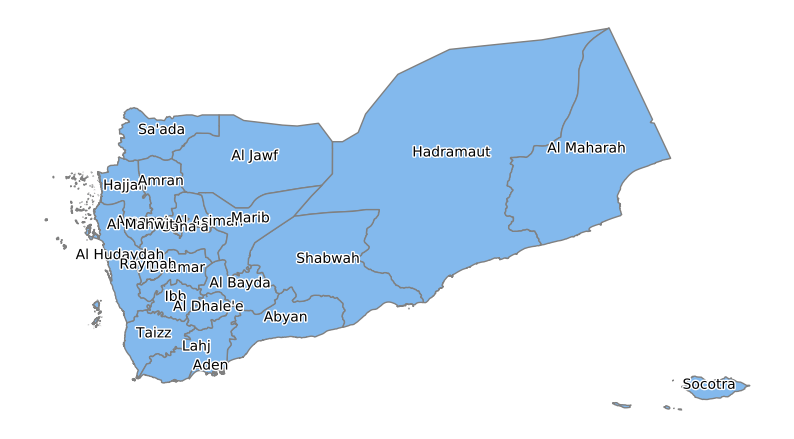

In [14]:
draw_adminstratas("Yemen", AdminStratas["Yemen"], AdminStratas["Yemen"], "../Shape Files/shapefiles/Yemen/administrative level 1", figsize = (10, 7), 
                  annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Yemen/map_rcsi_yemen.png", dpi = 300)

- **Nigeria (NGA)**: Nigeria is divided into 36 administrative regions. It also includes The Federal Capital Territory that is under the direct control of the federal government. The AdminStrata items of the rCSI >= 19 dataframe cover 3 administrative regions: Adamawa, Borno and Yobe. 

In [15]:
print(AdminStratas["Nigeria"].shape)
AdminStratas["Nigeria"]

(3,)


array(['Adamawa', 'Borno', 'Yobe'], dtype=object)

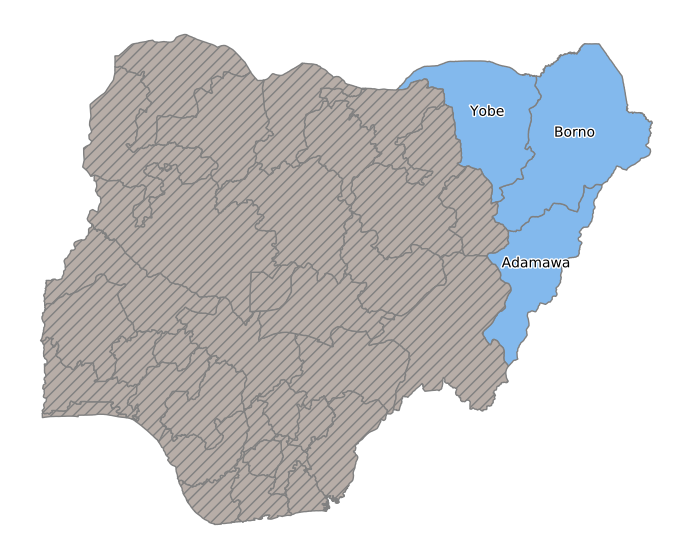

In [16]:
draw_adminstratas("Nigeria", AdminStratas["Nigeria"], AdminStratas["Nigeria"], "../Shape Files/shapefiles/Nigeria/administrative level 1", figsize = (10, 7), annotation = True, 
                  annotation_selected = True, path_to_save = PATH_TO_SAVE_DATA + "Nigeria/map_rcsi_nigeria.png", dpi = 300)

- **Syria (SYR)**: the administrative regions of the Syria country are 14. The rCSI >= 19 dataframe has the values of 13 administrative regions (Idleb administrative region not included).

In [17]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(13,)


array(['Al-Hasakeh', 'Aleppo', 'As-Sweida', 'Damascus', "Dar'a", 'Hama',
       'Homs', 'Lattakia', 'Rural Damascus', 'Tartous', 'Ar-Raqqa',
       'Deir-ez-Zor', 'Quneitra'], dtype=object)

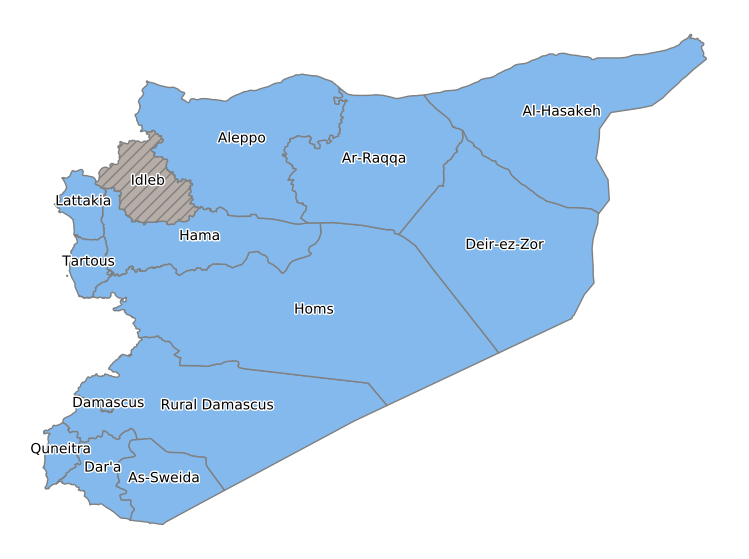

In [18]:
draw_adminstratas("Syria", AdminStratas["Syria"], AdminStratas["Syria"], "../Shape Files/shapefiles/Syria/administrative level 1", figsize = (10, 7), 
                  annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Syria/map_rcsi_syria.png", dpi = 300)

- **Burkina Faso (BFA)**: Burkina Faso is divided into 13 administrative regions. The rCSI >= 19 dataframe has the values of all 13 administrative regions.

In [19]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['Boucle-Du-Mouhoun', 'Cascades', 'Centre', 'Centre-Est',
       'Centre-Nord', 'Centre-Ouest', 'Centre-Sud', 'Est',
       'Hauts-Bassins', 'Nord', 'Plateau-Central', 'Sahel', 'Sud-Ouest'],
      dtype=object)

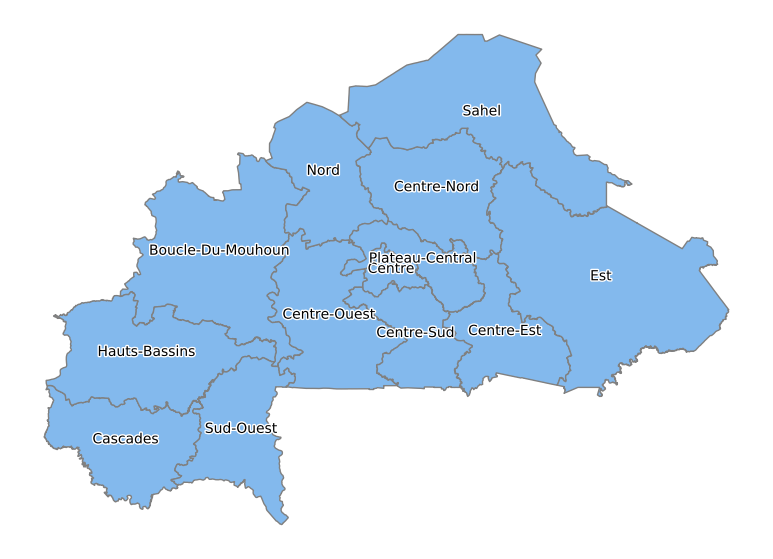

In [20]:
draw_adminstratas("Burkina Faso", AdminStratas["Burkina Faso"], AdminStratas["Burkina Faso"], "../Shape Files/shapefiles/Burkina Faso/administrative level 1", figsize = (10, 7), 
                  annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Burkina Faso/map_rcsi_burkina.png", dpi = 300)

## Data analysis

In [21]:
# Check the min e max values of the rCSI >= 19 column (% of people with rCSI >= 19).
print("min: %f, max: %f" % (df["rCSI >= 19"].min(), df["rCSI >= 19"].max()))

min: 0.000000, max: 99.974582


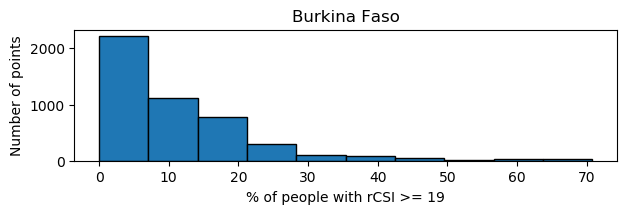

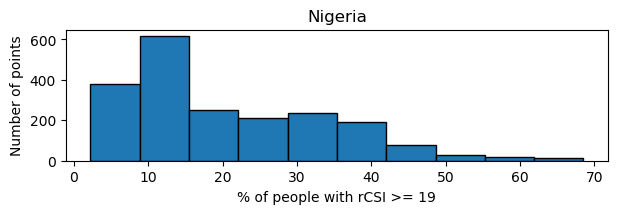

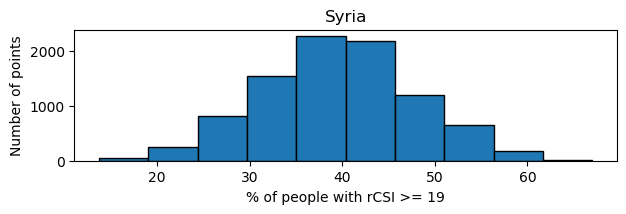

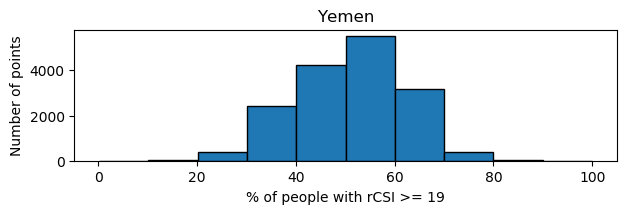

In [22]:
# Create an histogram referred to the values of the metric for each country.
def hist_rcsi(group):
    # Plot hist.
    fig, ax = plt.subplots(figsize = (7, 1.7))
    data = group["rCSI >= 19"].dropna().values
    ax.hist(data, ec = "k")
    ax.set_title(group.name)
    ax.set_ylabel("Number of points")
    ax.set_xlabel("% of people with rCSI >= 19")
    plt.show()

df.groupby("Country").apply(hist_rcsi);

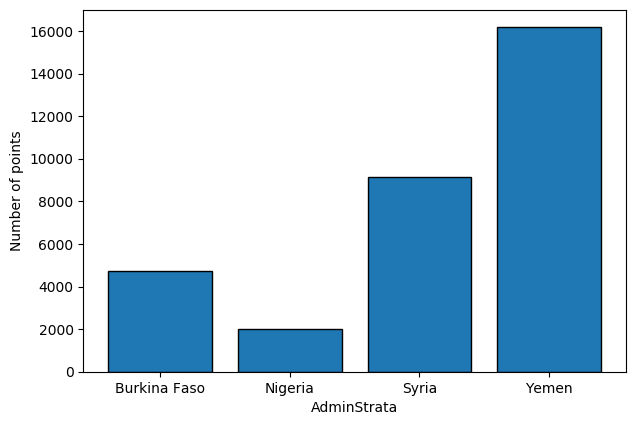

In [23]:
# Create an histogram referred to the number of total points for each country.
n_points = df.groupby("Country")["rCSI >= 19"].count()

fig, ax = plt.subplots(figsize = (7, 4.7))
ax.bar(n_points.index, n_points.values, ec = "k")
ax.set_ylabel("Number of points")
ax.set_xlabel("AdminStrata")
plt.show()

## Creation of the time-series

We create the time-series based on the rCSI >= 19 and SvyDateRange values.

In [24]:
# Delete the unused columns.
df.drop(["SvyDate", "SvyDate1", "SvyDate2"], axis = 1, inplace = True) 
# Creation of an accurate datetime format.
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.sort_values("Datetime", ascending = True, inplace = True) 
# Create time-series.
df = df.groupby(["Country", "AdminStrata"]).apply(lambda group: group.set_index("Datetime").resample("D").mean()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

,Country,AdminStrata,Datetime,rCSI >= 19,SvyDateRange
0,Burkina Faso,Boucle-Du-Mouhoun,2019-09-08,19.49950,56.0
1,Burkina Faso,Boucle-Du-Mouhoun,2019-09-09,19.56738,56.0
2,Burkina Faso,Boucle-Du-Mouhoun,2019-09-10,20.40068,56.0
3,Burkina Faso,Boucle-Du-Mouhoun,2019-09-11,20.40558,56.0
4,Burkina Faso,Boucle-Du-Mouhoun,2019-09-12,19.23853,56.0


In [25]:
# Create a dataframe with multi-index column in order to have a summary dataframe of the time-series.
df = df.set_index(["Datetime", "Country", "AdminStrata"]).unstack(["Country", "AdminStrata"]).reorder_levels([1, 2, 0], axis = 1).sort_index(axis = 1, level = [0, 1, 2])
df.columns.rename("Country", level = 0, inplace = True)
df.columns.rename("AdminStrata", level = 1, inplace = True)
df.columns.rename("Indicator", level = 2, inplace = True)
freq = "D"
df.index.freq = freq
df.head()

Country          Burkina Faso                                                  \
AdminStrata Boucle-Du-Mouhoun                Cascades                  Centre   
Indicator        SvyDateRange rCSI >= 19 SvyDateRange rCSI >= 19 SvyDateRange   
Datetime                                                                        
2018-08-22                NaN        NaN          NaN        NaN          NaN   
2018-08-23                NaN        NaN          NaN        NaN          NaN   
2018-08-24                NaN        NaN          NaN        NaN          NaN   
2018-08-25                NaN        NaN          NaN        NaN          NaN   
2018-08-26                NaN        NaN          NaN        NaN          NaN   

Country                                                                 ...  \
AdminStrata              Centre-Est             Centre-Nord             ...   
Indicator   rCSI >= 19 SvyDateRange rCSI >= 19 SvyDateRange rCSI >= 19  ...   
Datetime                                                                ...   
2018-08-22         NaN          NaN        NaN          NaN        NaN  ...   
2018-08-23         NaN          NaN        NaN          NaN        NaN  ...   
2018-08-24         NaN          NaN        NaN          NaN        NaN  ...   
2018-08-25         NaN          NaN        NaN          NaN        NaN  ...   
2018-08-26         NaN          NaN        NaN          NaN        NaN  ...   

Country            Yemen                                                  \
AdminStrata       Sa'ada                  Sana'a                 Shabwah   
Indicator   SvyDateRange rCSI >= 19 SvyDateRange rCSI >= 19 SvyDateRange   
Datetime                                                                   
2018-08-22          31.0  46.435518         31.0  52.667849         31.0   
2018-08-23          31.0  45.261947         31.0  50.214606         31.0   
2018-08-24          31.0  44.520462         31.0  50.073157         31.0   
2018-08-25          31.0  46.345940         31.0  48.791655         31.0   
2018-08-26          31.0  43.294599         31.0  48.839640         31.0   

Country                                                                 
AdminStrata                 Socotra                   Taizz             
Indicator   rCSI >= 19 SvyDateRange rCSI >= 19 SvyDateRange rCSI >= 19  
Datetime                                                                
2018-08-22   34.302200         31.0  38.303104         31.0  50.919038  
2018-08-23   36.742499         31.0  39.545071         31.0  50.415852  
2018-08-24   35.857748         31.0  41.867782         31.0  49.391298  
2018-08-25   34.658434         31.0  48.585591         31.0  50.302392  
2018-08-26   35.913080         31.0  48.662394         31.0  50.293046  

[5 rows x 102 columns]

In [26]:
# Plot time-series.
TsIP(df).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "% of people with rCSI >= 19", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [27]:
def full_extent(ax, pad = 0.0):
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
    items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    bbox = Bbox.union([item.get_window_extent() for item in items])
    return bbox.expanded(1.0 + pad, 1.0 + pad)

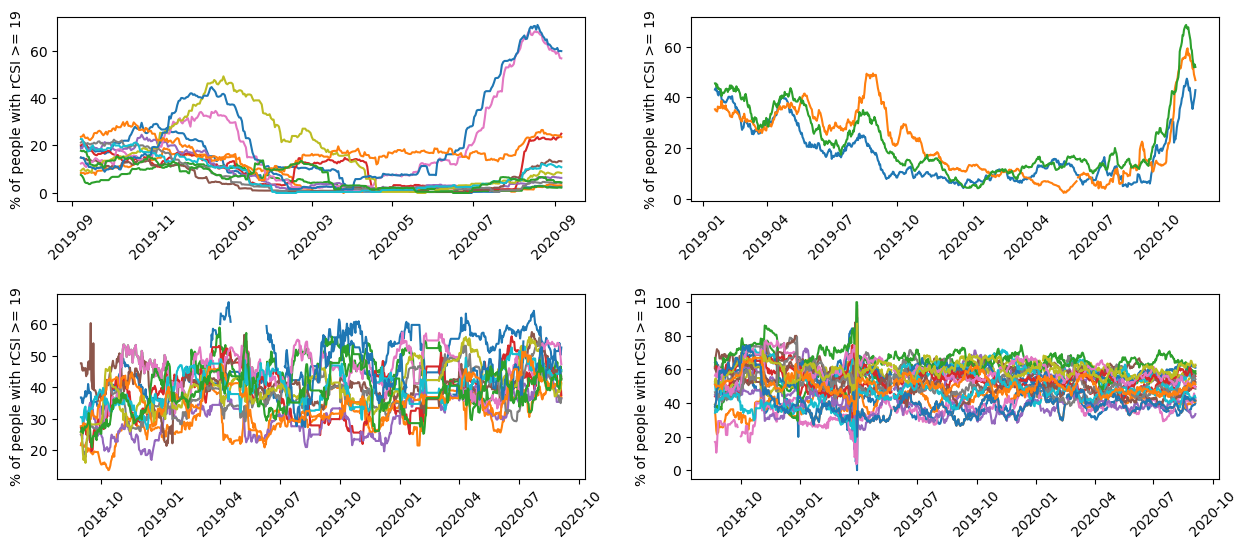

In [28]:
# Plot the original time-series of the rCSI >= 19 indicator for each country.
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 6))
fig.subplots_adjust(hspace = 0.5)
axs = axs.ravel()
for i, country in enumerate(df.columns.get_level_values(0).unique()):
    axs[i].plot(df[country].xs("rCSI >= 19", axis = 1, level = 1, drop_level = False))
    #axs[i].set_title(country)
    #axs[i].set_xlabel("Datetime")
    axs[i].set_ylabel("% of people with rCSI >= 19")
    axs[i].tick_params(axis = "x", labelrotation = 45)
    # Save just the portion of the current axes.
    extent = full_extent(axs[i]).transformed(fig.dpi_scale_trans.inverted())
    extent = axs[i].get_tightbbox(fig.canvas.renderer).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(PATH_TO_SAVE_DATA + "%s/ts_rcsi_%s.png" % (country, country), bbox_inches = extent, dpi = 300)

In [29]:
# Save the figure.
fig.savefig(PATH_TO_SAVE_DATA + "ts.png", dpi = 300)

In [30]:
# Now save the time-series of each country keeping as indeces for each time-series the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(PATH_TO_SAVE_DATA + country + "/" + name + ".csv", index_label = False)

In [31]:
# Save the time-series.
df.xs("rCSI >= 19", axis = 1, level = 2, drop_level = False).groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_rcsi"));

## Adjustment of the time-series (interpolation nan values)

Let's interpolate the nan values between the first and last valid index of each time-series using a linear interpolation up to a limit of 7 days. Finally, we delete the time-series that still have some nan values inside them. Concerning the SvyDateRange time-series, we decide to interpolate the nan values using a backfill strategy.

In [32]:
# Let's interpolate the nan values using a linear interpolation up to a limit of 7 days.
def interpolation(group):  
    indicator = group.name[2]
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    if indicator == "rCSI >= 19":
        group = group.interpolate(method = "linear", limit = 7, axis = 0)
    if indicator == "SvyDateRange":
        group = group.interpolate(method = "bfill", limit = 7, axis = 0)
    # Delete time-series that still have some NaN values.
    group.dropna(inplace = True, axis = 1)
    return group

df_interpolate = df.groupby(axis = 1, level = [0, 1, 2], group_keys = False).apply(interpolation)
df_interpolate.head()

Country          Burkina Faso                                                  \
AdminStrata Boucle-Du-Mouhoun                Cascades                  Centre   
Indicator        SvyDateRange rCSI >= 19 SvyDateRange rCSI >= 19 SvyDateRange   
Datetime                                                                        
2018-08-22                NaN        NaN          NaN        NaN          NaN   
2018-08-23                NaN        NaN          NaN        NaN          NaN   
2018-08-24                NaN        NaN          NaN        NaN          NaN   
2018-08-25                NaN        NaN          NaN        NaN          NaN   
2018-08-26                NaN        NaN          NaN        NaN          NaN   

Country                                                                 ...  \
AdminStrata              Centre-Est             Centre-Nord             ...   
Indicator   rCSI >= 19 SvyDateRange rCSI >= 19 SvyDateRange rCSI >= 19  ...   
Datetime                                                                ...   
2018-08-22         NaN          NaN        NaN          NaN        NaN  ...   
2018-08-23         NaN          NaN        NaN          NaN        NaN  ...   
2018-08-24         NaN          NaN        NaN          NaN        NaN  ...   
2018-08-25         NaN          NaN        NaN          NaN        NaN  ...   
2018-08-26         NaN          NaN        NaN          NaN        NaN  ...   

Country            Yemen                                                  \
AdminStrata       Sa'ada                  Sana'a                 Shabwah   
Indicator   SvyDateRange rCSI >= 19 SvyDateRange rCSI >= 19 SvyDateRange   
Datetime                                                                   
2018-08-22          31.0  46.435518         31.0  52.667849         31.0   
2018-08-23          31.0  45.261947         31.0  50.214606         31.0   
2018-08-24          31.0  44.520462         31.0  50.073157         31.0   
2018-08-25          31.0  46.345940         31.0  48.791655         31.0   
2018-08-26          31.0  43.294599         31.0  48.839640         31.0   

Country                                                                 
AdminStrata                 Socotra                   Taizz             
Indicator   rCSI >= 19 SvyDateRange rCSI >= 19 SvyDateRange rCSI >= 19  
Datetime                                                                
2018-08-22   34.302200         31.0  38.303104         31.0  50.919038  
2018-08-23   36.742499         31.0  39.545071         31.0  50.415852  
2018-08-24   35.857748         31.0  41.867782         31.0  49.391298  
2018-08-25   34.658434         31.0  48.585591         31.0  50.302392  
2018-08-26   35.913080         31.0  48.662394         31.0  50.293046  

[5 rows x 100 columns]

In [33]:
# Check what time-series are dropped.
for column in df.columns:
    if column not in df_interpolate.columns:
        print(column)

('Syria', 'Quneitra', 'SvyDateRange')
('Syria', 'Quneitra', 'rCSI >= 19')


In [34]:
# Plot time-series.
TsIP(df_interpolate).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "% of people with rCSI >= 19", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

## Adjustment of March month for the Yemen country

We remove the values for the month of March 2019 beacuse it seems to have some anomalies. We then replace the values using a simple linear interpolation.

### Remove month

In [35]:
def remove_march_Yemen(group):
    country = group.name[0]
    if country == "Yemen":
        mask = (group.index >= "2019-3-1") & (group.index <= "2019-3-31")
        group.loc[mask] = np.nan    
        return group
    else:
        return group

In [36]:
df_interpolate_no_march = df_interpolate.groupby(level = [0, 1], axis = 1, group_keys = False).apply(remove_march_Yemen)

In [37]:
# Plot time-series.
TsIP(df_interpolate_no_march).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "% of people with rCSI >= 19", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

### Replace month

In [38]:
def interpolate_march_Yemen(group):
    country = group.name[0]
    if country == "Yemen":
        mask = (group.index >= "2019-3-1") & (group.index <= "2019-3-31")
        group.loc[mask] = np.nan    
        first_idx = group.first_valid_index()
        last_idx = group.last_valid_index()
        group = group.loc[first_idx:last_idx]
        group = group.interpolate(method = "linear")
        return group
    else:
        return group

In [39]:
df_interpolate_replace_month = df_interpolate.groupby(level = [0, 1], axis = 1, group_keys = False).apply(interpolate_march_Yemen)

In [40]:
# Plot time-series.
TsIP(df_interpolate_replace_month).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "% of people with rCSI >= 19", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [41]:
# Plot time-series without survey coverage information.
TsIP(df_interpolate_replace_month.xs("rCSI >= 19", axis = 1, level = 2, drop_level = False)).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "% of people with rCSI >= 19", first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Nigeria', 'Syria', 'Yemen…

In [42]:
# Save these new time-series.
df_interpolate_replace_month.xs("rCSI >= 19", axis = 1, level = 2, drop_level = False).groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_rcsi-interpolate"));